# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo01_encoded.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [3]:
df.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Academic degree                    int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64


In [4]:
df.isna().any()

sexo                                      False
posse_de_veiculo                          False
posse_de_imovel                           False
qtd_filhos                                False
idade                                     False
tempo_emprego                             False
possui_celular                            False
possui_fone_comercial                     False
possui_fone                               False
possui_email                              False
qt_pessoas_residencia                     False
mau                                       False
tipo_renda_Commercial associate           False
tipo_renda_Pensioner                      False
tipo_renda_State servant                  False
tipo_renda_Student                        False
tipo_renda_Working                        False
educacao_Academic degree                  False
educacao_Higher education                 False
educacao_Incomplete higher                False
educacao_Lower secondary                

In [5]:
df.shape

(16650, 33)

In [6]:
df.drop_duplicates().shape

(6770, 33)

In [7]:
df = df.drop_duplicates()

In [8]:
df.mau.value_counts()

0    6472
1     298
Name: mau, dtype: int64

In [9]:
y = df.mau

In [10]:
x = df.drop('mau', axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
clf = DecisionTreeClassifier(random_state=100)

In [13]:
clf = clf.fit(x_train,y_train)

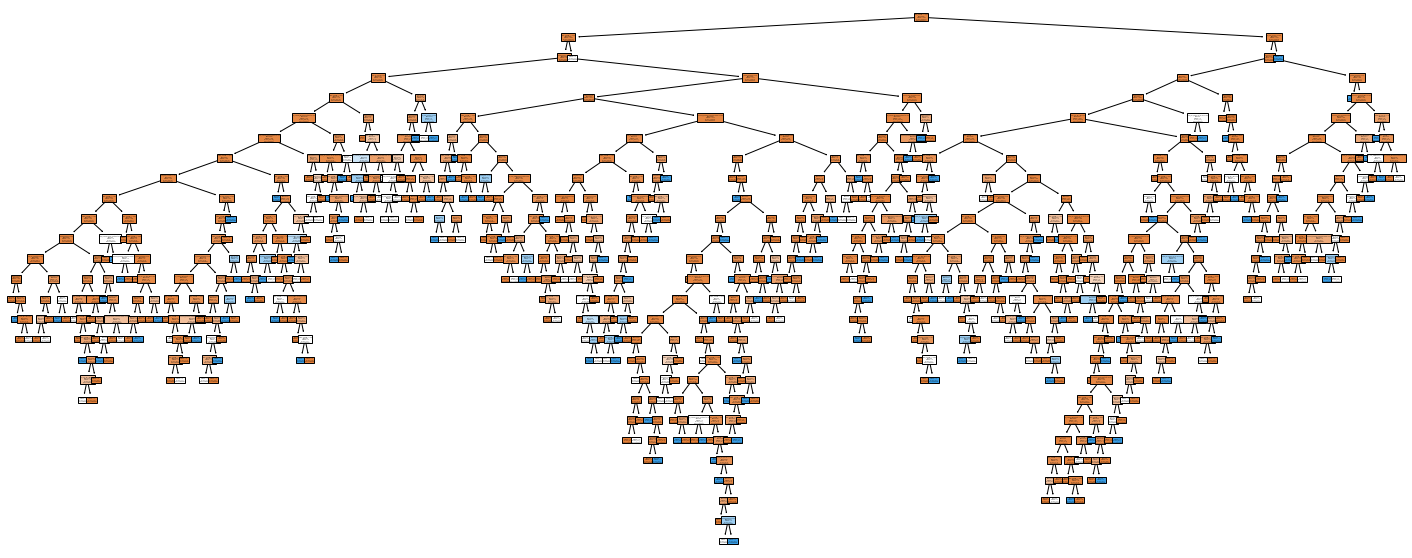

In [14]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=x.columns);

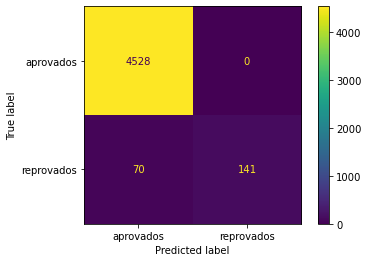

In [15]:
plot_confusion_matrix(clf, x_train, y_train, display_labels =  ['aprovados', 'reprovados'])

In [16]:
predict_train =  clf.predict(x_train)
accuracy_score(y_train, predict_train)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

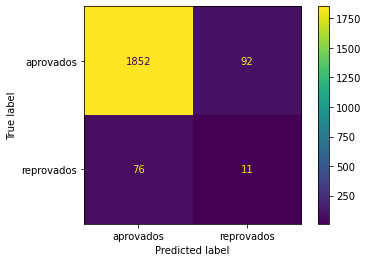

In [17]:
plot_confusion_matrix(clf, x_test, y_test, display_labels =  ['aprovados', 'reprovados'])

In [18]:
predict_test =  clf.predict(x_test)
accuracy_score(y_test, predict_test)

0.9172821270310192

A acurácia do teste (91,7%) é pouco menor que a acurácia do treino (98,5%), porém, na matriz de confusão do teste verifica-se que a maioria dos clientes que o modelo classificou como reprovados, foram aprovados na análise de crédito, enquanto a maior parte dos clientes que deveriam ter sido reprovados, foram aprovados pelo modelo.

Os resultados indicam que houve overfitting do modelo criado, e a alta acurácia do teste pode ser explicada pelo alto número de clientes bom pagadores.

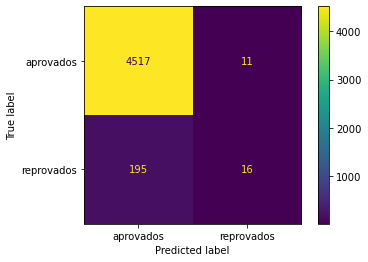

In [19]:
clf_podada = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf_podada = clf_podada.fit(x_train, y_train)
plot_confusion_matrix(clf_podada, x_train, y_train, display_labels =  ['aprovados', 'reprovados'])

In [20]:
predict_train_podada =  clf_podada.predict(x_train)
accuracy_score(y_train, predict_train_podada)

0.9565309136948723

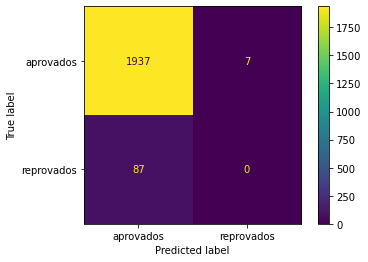

In [21]:
plot_confusion_matrix(clf_podada, x_test, y_test, display_labels =  ['aprovados', 'reprovados'])

In [22]:
predict_test_podada =  clf_podada.predict(x_test)
accuracy_score(y_test, predict_test_podada)

0.9537173806006893

In [23]:
x_train.shape

(4739, 32)

In [24]:
y_train.value_counts()

0    4528
1     211
Name: mau, dtype: int64

In [25]:
x_test.shape

(2031, 32)

In [26]:
y_test.value_counts()

0    1944
1      87
Name: mau, dtype: int64

Na base de treino, a proporção de clientes previstos pelo modelo como mau pagadores foi de 0,57%, e na base de treino foi 0,34%.

Na realidade, a proporção de mau pagadores em cada base de dado foi, respectivamente 4,45% e 4,28%. O que indica que o modelo construído não é eficaz em prever a variável 'mau'.

In [27]:
#acurácia do treino caso todos fossem classificados como bom
ac_treino = 4528/4728
ac_treino

0.9576988155668359

In [28]:
#acurácia do teste caso todos fossem classificados como bom
ac_teste = 1944/2031
ac_teste

0.9571639586410635

Se todos os proponentes fosse aprovados,a acurácia seria de 95,7%, maior que a acurácia dos modelos contruídos, o que evidencia a ineficácia destes.